<a href="https://colab.research.google.com/github/jashangrover324/Credit_card_default_prediction/blob/main/EDA_and_model_workflow_DEFAULT_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('/content/train_dataset_final1.csv')
pd.set_option('display.max_columns', None)
df.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,Bill_amt1,Bill_amt2,Bill_amt3,Bill_amt4,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,0,0,60323.86,60728.22,56472.74,28602.01,22191.53,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,-1,0,11157.67,0.00,0.88,0.65,2700.96,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,0,0,47930.96,48921.91,50034.26,50748.90,51902.56,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,0,0,91152.44,92916.01,90652.30,85295.56,80416.75,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,-2,-2,19666.40,999.04,3186.48,44932.48,2099.77,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


In [3]:
df.shape

(25247, 27)

In [4]:
df.dtypes

,0
Customer_ID,int64
marriage,int64
sex,int64
education,int64
LIMIT_BAL,int64
age,float64
pay_0,int64
pay_2,int64
pay_3,int64
pay_4,int64


In [5]:
df.isnull().sum()

,0
Customer_ID,0
marriage,0
sex,0
education,0
LIMIT_BAL,0
age,126
pay_0,0
pay_2,0
pay_3,0
pay_4,0


In [6]:
df['age'] = df['age'].fillna(df['age'].median())


In [7]:
df.describe()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,Bill_amt1,Bill_amt2,Bill_amt3,Bill_amt4,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
count,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,2.524700e+04,25247.000000,25247.000000,25247.000000,25247.000000,2.524700e+04,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000
mean,17640.000000,1.551907,0.604111,1.852101,168342.060443,35.431022,-0.042857,-0.159544,-0.190359,-0.241415,-0.282568,-0.307680,51170.887938,49092.268745,4.695839e+04,43134.911103,40218.976171,38806.221029,5718.624966,6.047352e+03,5288.910651,4865.960834,4906.766828,5270.499287,44859.647485,0.362962,0.190399
std,7288.325459,0.522629,0.489050,0.797379,129892.784807,9.152635,1.099315,1.173990,1.172636,1.146753,1.114213,1.130864,73250.806650,70695.367650,6.895687e+04,63846.205694,60389.690737,59182.792531,16806.842125,2.400962e+04,17851.879609,15979.116544,15860.726852,17960.816915,62819.226119,5.047206,0.392624
min,5017.000000,0.000000,0.000000,0.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-56043.170000,-546.930000,0.000000
25%,11328.500000,1.000000,0.000000,1.000000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3601.340000,3017.155000,2.753275e+03,2319.615000,1770.625000,1241.710000,999.985000,9.219100e+02,399.990000,300.150000,262.365000,130.070000,4858.670000,0.040000,0.000000
50%,17640.000000,2.000000,1.000000,2.000000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22436.740000,21245.880000,2.008554e+04,19027.840000,18069.760000,17102.580000,2145.020000,2.026830e+03,1844.300000,1500.100000,1513.790000,1500.040000,21102.830000,0.090000,0.000000
75%,23951.500000,2.000000,1.000000,2.000000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67373.410000,64151.875000,6.022971e+04,54391.160000,50289.525000,49245.195000,5031.150000,5.000190e+03,4600.640000,4014.990000,4099.890000,4018.780000,57136.580000,0.590000,0.000000
max,30263.000000,3.000000,1.000000,6.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,7.000000,7.000000,8.000000,964511.160000,983931.050000,1.664089e+06,891585.580000,927172.770000,961663.620000,873551.980000,1.684259e+06,896040.150000,621000.080000,426529.180000,528666.150000,877313.830000,205.380000,1.000000


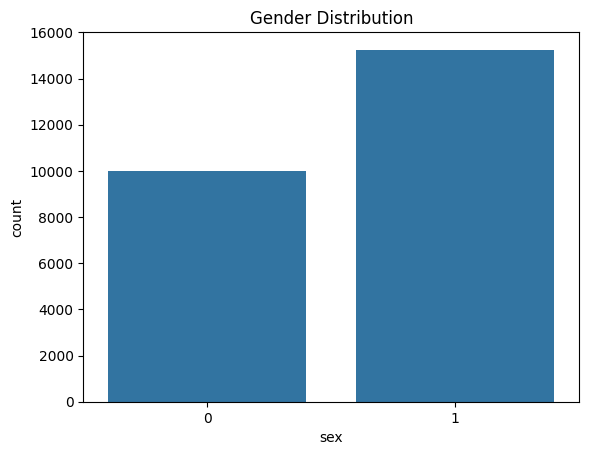

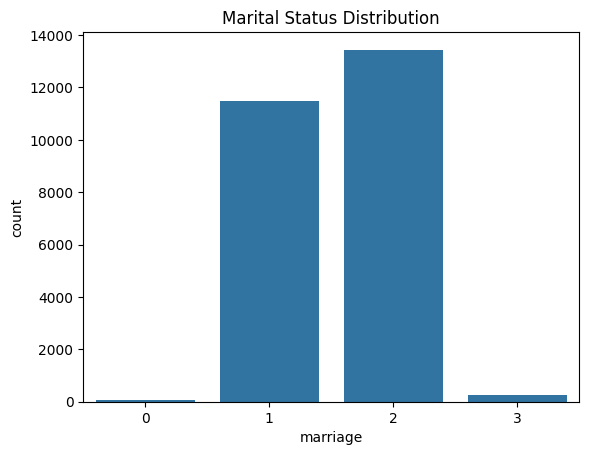

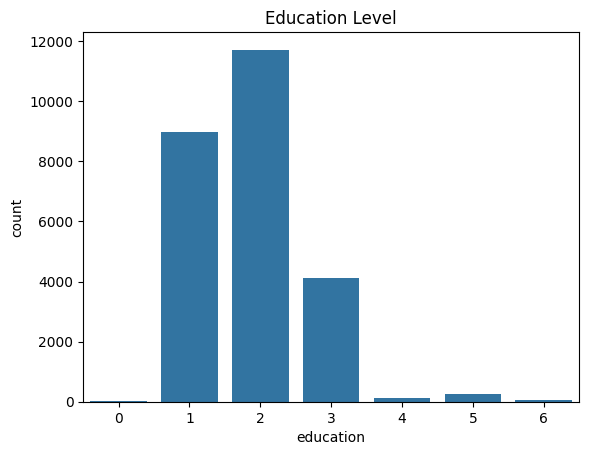

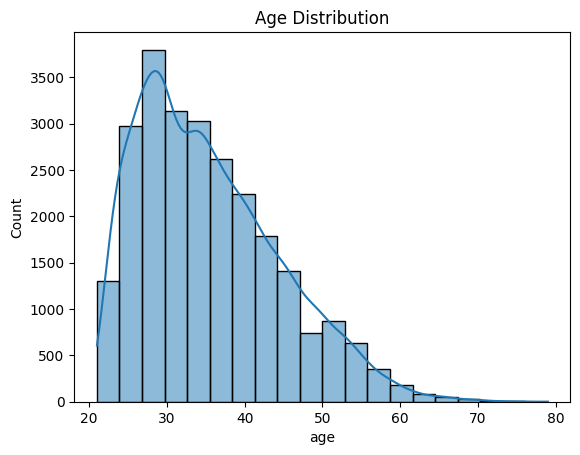

In [8]:
# Gender distribution
sns.countplot(data=df, x='sex')
plt.title('Gender Distribution')
plt.show()

# Marital status
sns.countplot(data=df, x='marriage')
plt.title('Marital Status Distribution')
plt.show()

# Education
sns.countplot(data=df, x='education')
plt.title('Education Level')
plt.show()

# Age distribution
sns.histplot(data=df, x='age', bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

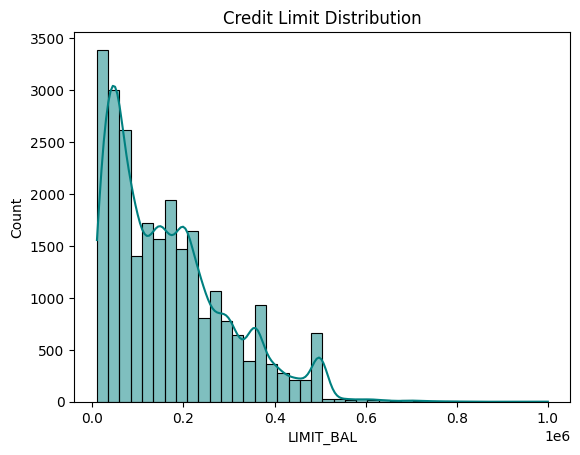

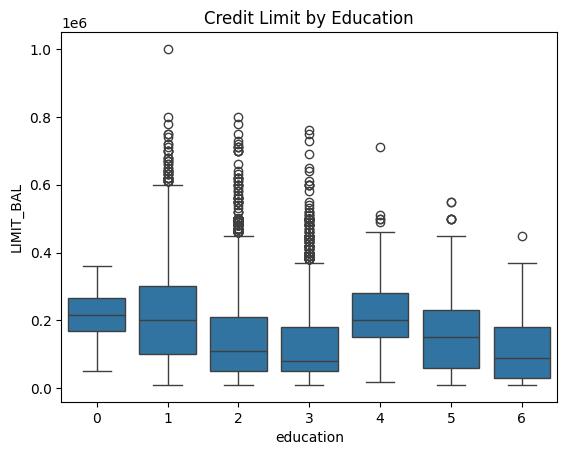

In [9]:
# Distribution
sns.histplot(df['LIMIT_BAL'], bins=40, kde=True, color='teal')
plt.title('Credit Limit Distribution')
plt.show()

# By Education
sns.boxplot(data=df, x='education', y='LIMIT_BAL')
plt.title('Credit Limit by Education')
plt.show()


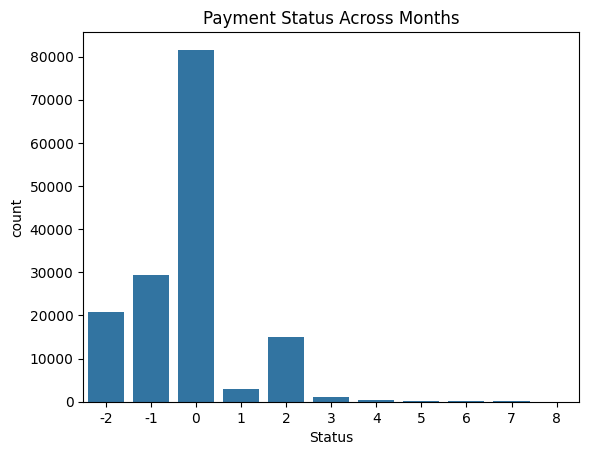

In [10]:
pay_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
df_melted = df.melt(value_vars=pay_cols, var_name='Month', value_name='Status')

# Plot
sns.countplot(data=df_melted, x='Status', order=sorted(df_melted['Status'].unique()))
plt.title('Payment Status Across Months')
plt.show()


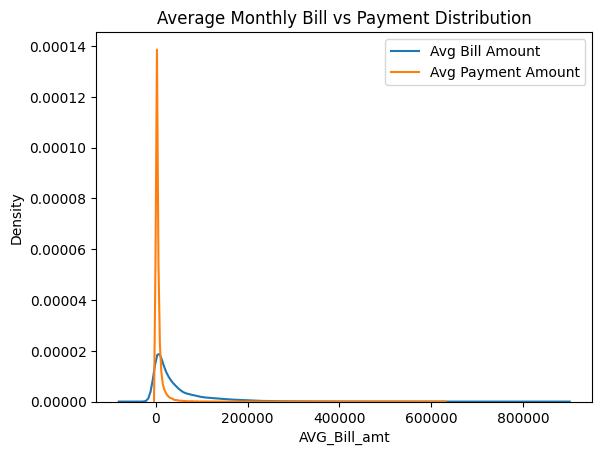

In [11]:
bill_cols = ['Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6']
pay_amt_cols = ['pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']

df['avg_payment'] = df[pay_amt_cols].mean(axis=1)

sns.kdeplot(df['AVG_Bill_amt'], label='Avg Bill Amount')
sns.kdeplot(df['avg_payment'], label='Avg Payment Amount')
plt.title('Average Monthly Bill vs Payment Distribution')
plt.legend()
plt.show()


In [12]:
df_org=df.copy()
df_org

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,Bill_amt1,Bill_amt2,Bill_amt3,Bill_amt4,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default,avg_payment
0,5017,2,0,2,60000,25.0,2,2,2,0,0,0,60323.86,60728.22,56472.74,28602.01,22191.53,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0,1326.185000
1,5018,2,1,1,290000,24.0,0,0,-2,-2,-1,0,11157.67,0.00,0.88,0.65,2700.96,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0,674.998333
2,5019,1,0,2,180000,63.0,0,0,0,0,0,0,47930.96,48921.91,50034.26,50748.90,51902.56,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0,2009.286667
3,5020,1,1,2,210000,43.0,0,0,0,0,0,0,91152.44,92916.01,90652.30,85295.56,80416.75,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0,3074.916667
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,-2,-2,19666.40,999.04,3186.48,44932.48,2099.77,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0,8552.366667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25242,30259,1,1,2,90000,33.0,0,0,0,0,2,2,75452.79,76395.38,79167.72,84903.65,87915.80,90042.87,2800.18,3999.97,8000.09,5347.85,3699.98,3128.06,82312.50,0.05,0,4496.021667
25243,30260,1,0,2,60000,49.0,0,0,0,0,0,0,59578.90,66780.96,65507.11,17677.07,19481.11,19204.07,22000.17,2187.56,2501.13,2512.09,4004.89,2604.22,41371.67,0.14,1,5968.343333
25244,30261,2,0,1,120000,31.0,-1,-1,-1,-1,-1,-1,1315.64,1315.42,1315.52,533.03,4115.37,9834.64,1315.83,1315.60,533.08,4116.08,9834.10,7100.12,3071.83,1.31,1,4035.801667
25245,30262,1,1,4,390000,40.0,0,0,0,0,0,0,195687.97,199033.02,197960.89,195958.31,196017.91,199013.32,7636.03,5652.86,5544.67,5532.37,5859.09,6818.14,197278.83,0.03,0,6173.860000


In [13]:
import pandas as pd
import numpy as np
from scipy.stats import linregress

# Define columns
pay_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
bill_cols = ['Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6']
pay_amt_cols = ['pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']

# 1. Credit Utilization Ratio
df['credit_utilization'] = df['AVG_Bill_amt'] / df['LIMIT_BAL']

# 2. Delinquency Streak
def longest_delinquency_streak(row):
    streak = max_streak = 0
    for col in pay_cols:
        if row[col] > 0:
            streak += 1
            max_streak = max(max_streak, streak)
        else:
            streak = 0
    return max_streak

df['delinquency_streak'] = df.apply(longest_delinquency_streak, axis=1)

# 3. Average Payment Delay (ignoring -1, -2, and 0)
df['avg_payment_delay'] = df[pay_cols].apply(lambda x: x[x > 0].mean() if any(x > 0) else 0, axis=1)

# 4. Payment Consistency Ratio
df['payment_consistency'] = df[pay_amt_cols].gt(0).sum(axis=1) / 6

# 5. Overpayment Indicator (any)
df['has_overpaid'] = df[bill_cols].lt(0).any(axis=1).astype(int)

# 6. Total Missed Payments
df['missed_payments'] = df[pay_cols].gt(0).sum(axis=1)

# 7. Utilization Volatility
df['utilization_volatility'] = df[bill_cols].std(axis=1)

# 8. Repayment to Utilization Ratio
df['repayment_to_utilization'] = df[pay_amt_cols].sum(axis=1) / df[bill_cols].sum(axis=1).replace(0, np.nan)
df['repayment_to_utilization'] = df['repayment_to_utilization'].fillna(0)

# 9. Number of Full Payments (payment ≥ bill)
df['full_payments'] = (df[pay_amt_cols].values >= df[bill_cols].values).sum(axis=1)

# 10. Payment Delay Std Dev
df['payment_delay_std'] = df[pay_cols].std(axis=1)

# 11. Bill Trend (slope)
df['bill_trend'] = df[bill_cols].apply(lambda row: linregress(range(1, 7), row)[0], axis=1)

# 12. Bill Skewness
df['bill_skewness'] = df[bill_cols].skew(axis=1)

# 13. Maximum Delay
df['max_payment_delay'] = df[pay_cols].max(axis=1)

# 14. Underpayment Frequency (payment < bill)
df['underpayments'] = (df[pay_amt_cols].values < df[bill_cols].values).sum(axis=1)

# 15. Zero Spending Months
df['zero_spending_months'] = (df[bill_cols] == 0).sum(axis=1)

# 16. Late Payment Ratio
df['late_payment_ratio'] = df[pay_cols].gt(0).sum(axis=1) / 6

# 17. No Usage Flag
df['no_usage_flag'] = (df[bill_cols].sum(axis=1) == 0).astype(int)


df.head()


,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,Bill_amt1,Bill_amt2,Bill_amt3,Bill_amt4,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default,avg_payment,credit_utilization,delinquency_streak,avg_payment_delay,payment_consistency,has_overpaid,missed_payments,utilization_volatility,repayment_to_utilization,full_payments,payment_delay_std,bill_trend,bill_skewness,max_payment_delay,underpayments,zero_spending_months,late_payment_ratio,no_usage_flag
0,5017,2,0,2,60000,25.0,2,2,2,0,0,0,60323.86,60728.22,56472.74,28602.01,22191.53,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0,1326.185000,0.691858,3,2.0,0.833333,0,3,19585.483475,0.031947,0,1.095445,-9752.770000,-0.048236,2,6,0,0.5,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,-1,0,11157.67,0.00,0.88,0.65,2700.96,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0,674.998333,0.008740,0,0.0,0.500000,0,0,4360.101233,0.266263,2,0.983192,-1169.548571,2.137511,0,4,1,0.0,0
2,5019,1,0,2,180000,63.0,0,0,0,0,0,0,47930.96,48921.91,50034.26,50748.90,51902.56,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0,2009.286667,0.280122,0,0.0,1.000000,0,0,1871.213251,0.039850,0,0.000000,998.838286,0.062749,0,6,0,0.0,0
3,5020,1,1,2,210000,43.0,0,0,0,0,0,0,91152.44,92916.01,90652.30,85295.56,80416.75,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0,3074.916667,0.410617,0,0.0,1.000000,0,0,6470.848989,0.035660,0,0.000000,-3253.982000,-0.545667,0,6,0,0.0,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,-2,-2,19666.40,999.04,3186.48,44932.48,2099.77,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0,8552.366667,0.042194,0,0.0,1.000000,0,0,17797.732038,0.723902,2,0.000000,-1522.201714,1.720749,-2,4,0,0.0,0


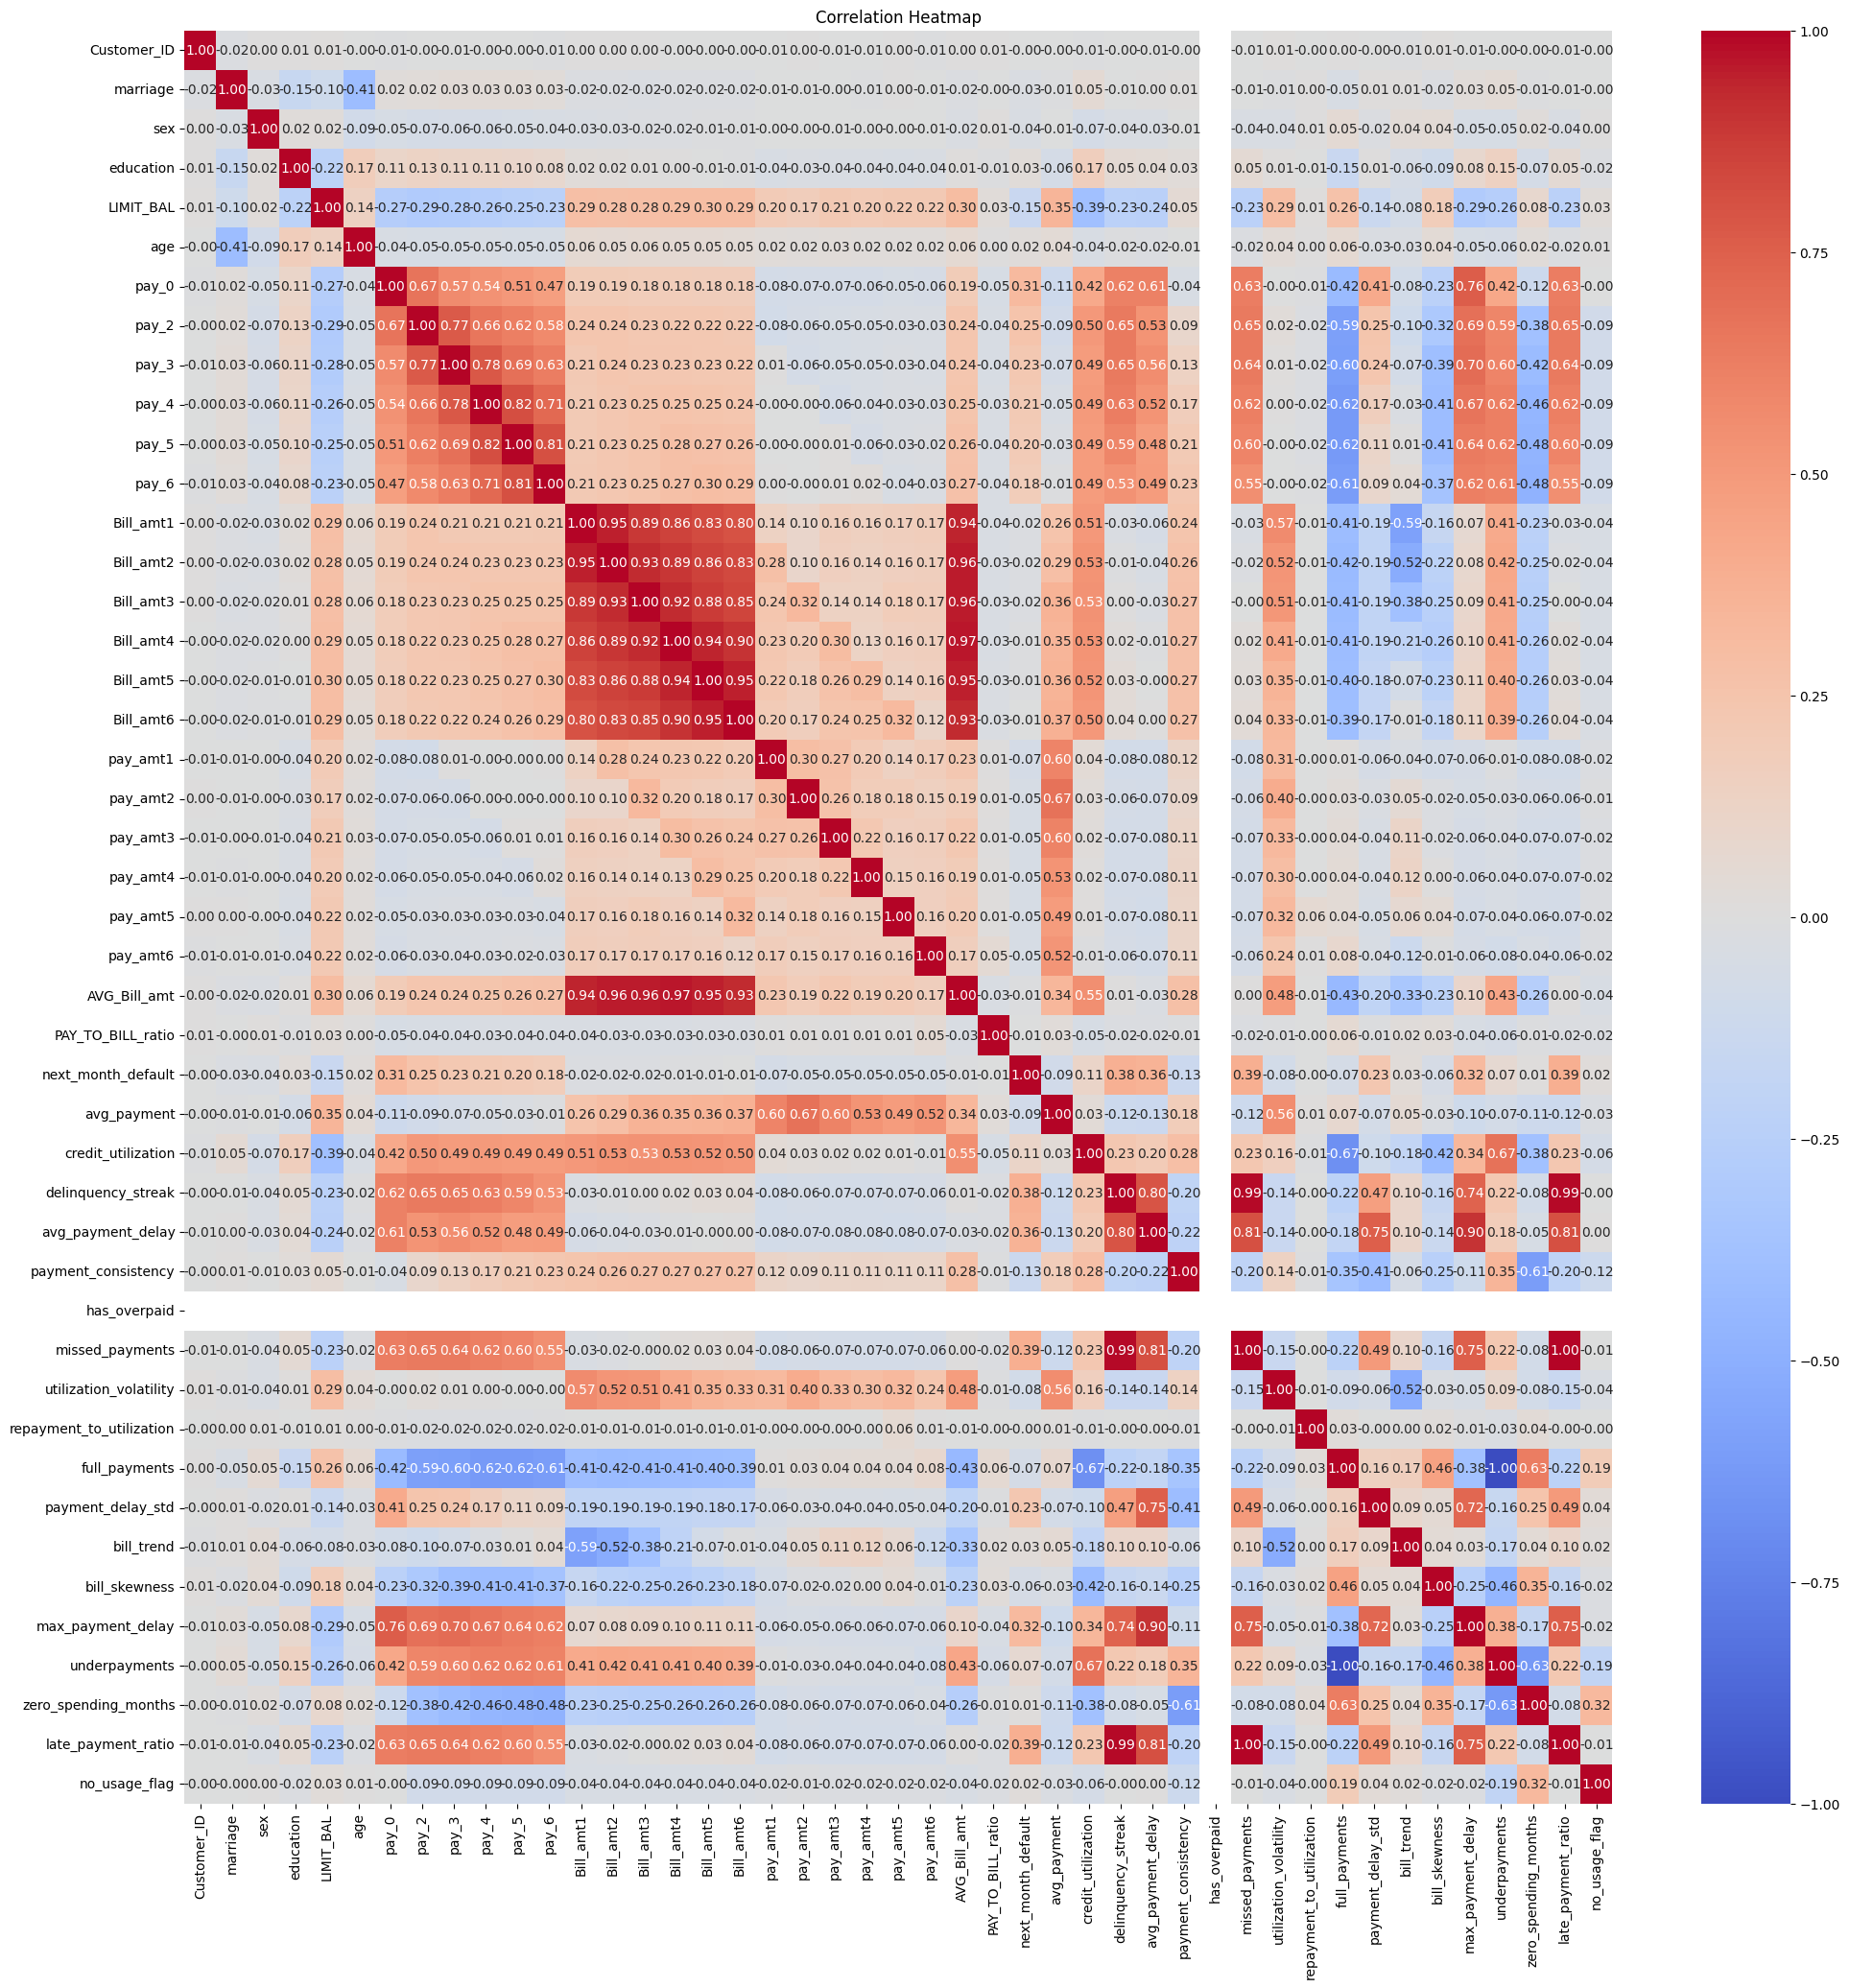

In [14]:
plt.figure(figsize=(24, 24))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [15]:
df['has_overpaid'].value_counts()

,count
has_overpaid,
0,25247


In [16]:
X = df.drop(columns=['Customer_ID','next_month_default'])
y = df['next_month_default']

In [17]:
X,y

(       marriage  sex  education  LIMIT_BAL   age  pay_0  pay_2  pay_3  pay_4  \
 0             2    0          2      60000  25.0      2      2      2      0   
 1             2    1          1     290000  24.0      0      0     -2     -2   
 2             1    0          2     180000  63.0      0      0      0      0   
 3             1    1          2     210000  43.0      0      0      0      0   
 4             2    0          1     280000  32.0     -2     -2     -2     -2   
 ...         ...  ...        ...        ...   ...    ...    ...    ...    ...   
 25242         1    1          2      90000  33.0      0      0      0      0   
 25243         1    0          2      60000  49.0      0      0      0      0   
 25244         2    0          1     120000  31.0     -1     -1     -1     -1   
 25245         1    1          4     390000  40.0      0      0      0      0   
 25246         1    1          2     160000  58.0     -1     -1     -1     -1   
 
        pay_5  pay_6  Bill

In [18]:
df.isnull().sum()

,0
Customer_ID,0
marriage,0
sex,0
education,0
LIMIT_BAL,0
age,0
pay_0,0
pay_2,0
pay_3,0
pay_4,0


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

# 1. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 2. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [20]:
print(y_train.value_counts())
print(y_train_resampled.value_counts())

next_month_default
0    16352
1     3845
Name: count, dtype: int64
next_month_default
0    16352
1    16352
Name: count, dtype: int64


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, fbeta_score

# 1. Train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000, solver='lbfgs', class_weight='balanced', random_state=42)
logreg.fit(X_train_resampled, y_train_resampled)

# 2. Predict probabilities for class 1
y_proba = logreg.predict_proba(X_test_scaled)[:, 1]

# 3. Find the best threshold based on F2 score
best_threshold = 0.5
best_f2 = 0

for threshold in np.arange(0.1, 0.91, 0.01):
    y_pred_thresh = (y_proba >= threshold).astype(int)
    f2 = fbeta_score(y_test, y_pred_thresh, beta=2)
    if f2 > best_f2:
        best_f2 = f2
        best_threshold = threshold

# 4. Final predictions with best threshold
y_pred = (y_proba >= best_threshold).astype(int)

print(f"\nBest Threshold: {best_threshold:.2f}")
print(f"F2 Score at Best Threshold: {best_f2:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Best Threshold: 0.36
F2 Score at Best Threshold: 0.5970

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.55      0.69      4088
           1       0.30      0.80      0.43       962

    accuracy                           0.60      5050
   macro avg       0.61      0.68      0.56      5050
weighted avg       0.80      0.60      0.64      5050




Best Threshold: 0.19
F2 Score at Best Threshold: 0.6120

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.45      0.61      4088
           1       0.27      0.88      0.42       962

    accuracy                           0.53      5050
   macro avg       0.61      0.67      0.51      5050
weighted avg       0.82      0.53      0.57      5050



/tmp/ipython-input-22-1722146717.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette='viridis')


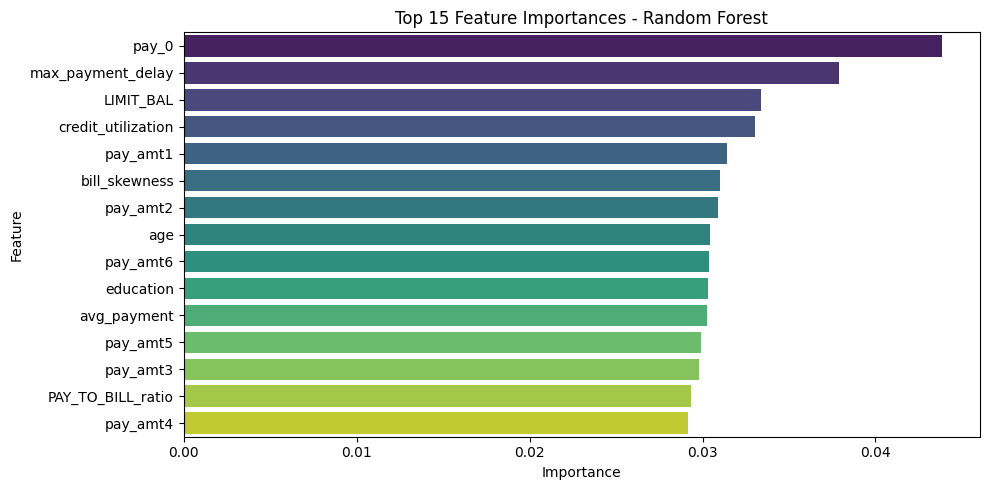

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, fbeta_score

# 1. Train the Random Forest model
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

# 2. Predict probabilities for class 1
y_proba = rf.predict_proba(X_test_scaled)[:, 1]

# 3. Find the best threshold based on F2 score
best_threshold = 0.5
best_f2 = 0

for threshold in np.arange(0.1, 0.91, 0.01):
    y_pred_thresh = (y_proba >= threshold).astype(int)
    f2 = fbeta_score(y_test, y_pred_thresh, beta=2)
    if f2 > best_f2:
        best_f2 = f2
        best_threshold = threshold

# 4. Final predictions with best threshold
y_pred = (y_proba >= best_threshold).astype(int)

print(f"\nBest Threshold: {best_threshold:.2f}")
print(f"F2 Score at Best Threshold: {best_f2:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# 5. Feature importance analysis
importances = rf.feature_importances_
feature_names = X.columns  # assuming X is your original DataFrame
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 6. Plot top 15 important features
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette='viridis')
plt.title('Top 15 Feature Importances - Random Forest')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:50:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Best Threshold: 0.23
F2 Score at Best Threshold: 0.5859

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.52      0.67      4088
           1       0.28      0.80      0.42       962

    accuracy                           0.58      5050
   macro avg       0.60      0.66      0.54      5050
weighted avg       0.80      0.58      0.62      5050



/tmp/ipython-input-23-3138851738.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette='viridis')


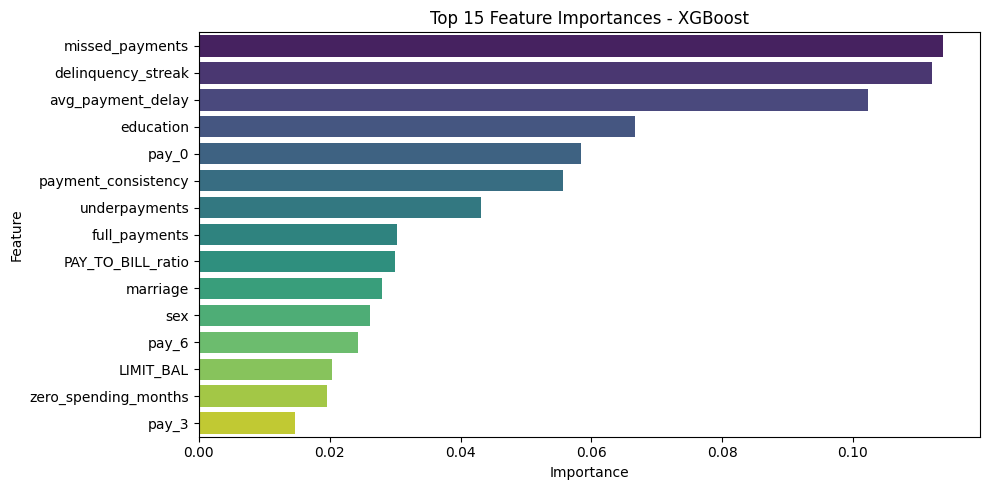

In [23]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, fbeta_score

# 1. Train the XGBoost model
xgb_model = XGBClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    scale_pos_weight=5,  # adjust based on class imbalance
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train_resampled, y_train_resampled)

# 2. Predict probabilities for class 1
y_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]

# 3. Find the best threshold for maximum F2 score
best_threshold = 0.5
best_f2 = 0

for threshold in np.arange(0.1, 0.91, 0.01):
    y_pred_thresh = (y_proba >= threshold).astype(int)
    f2 = fbeta_score(y_test, y_pred_thresh, beta=2)
    if f2 > best_f2:
        best_f2 = f2
        best_threshold = threshold

# 4. Final predictions with best threshold
y_pred = (y_proba >= best_threshold).astype(int)

print(f"\nBest Threshold: {best_threshold:.2f}")
print(f"F2 Score at Best Threshold: {best_f2:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# 5. Feature Importance Plot
importances = xgb_model.feature_importances_
feature_names = X.columns  # assuming X is your original DataFrame
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 6. Plot top 15 features
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette='viridis')
plt.title('Top 15 Feature Importances - XGBoost')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 16352, number of negative: 16352
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005744 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10314
[LightGBM] [Info] Number of data points in the train set: 32704, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.833333 -> initscore=1.609438
[LightGBM] [Info] Start training from score 1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Best Threshold: 0.30
F2 Score at Best Threshold: 0.5880

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.59      0.72      4088
           1       0.30      0.77      0.44       962

    accuracy                           0.62      5050
   macro avg       0.61      0.68      0.58      5050
weighted avg       0.80      0.62      0.66      5050



/tmp/ipython-input-24-2647110730.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette='viridis')


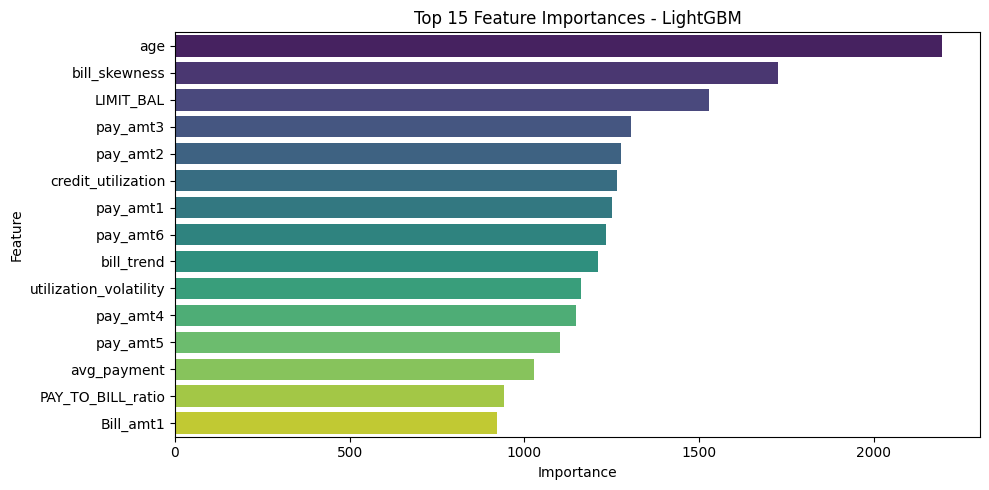

In [24]:
from lightgbm import LGBMClassifier
from sklearn.metrics import fbeta_score, classification_report

# 1. Train the LightGBM model
lgb_model = LGBMClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    class_weight={0:1, 1:5},  # Adjust if you know class imbalance ratio
    random_state=42
)
lgb_model.fit(X_train_resampled, y_train_resampled)

# 2. Predict probabilities for class 1
y_proba = lgb_model.predict_proba(X_test_scaled)[:, 1]

# 3. Find the best threshold based on F2 score
best_threshold = 0.5
best_f2 = 0

for threshold in np.arange(0.1, 0.91, 0.01):
    y_pred_thresh = (y_proba >= threshold).astype(int)
    f2 = fbeta_score(y_test, y_pred_thresh, beta=2)
    if f2 > best_f2:
        best_f2 = f2
        best_threshold = threshold

# 4. Final predictions with best threshold
y_pred = (y_proba >= best_threshold).astype(int)

print(f"\nBest Threshold: {best_threshold:.2f}")
print(f"F2 Score at Best Threshold: {best_f2:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# 5. Feature Importance
importances = lgb_model.feature_importances_
feature_names = X.columns  # assuming X is your original DataFrame
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 6. Plot top 15 important features
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette='viridis')
plt.title('Top 15 Feature Importances - LightGBM')
plt.tight_layout()
plt.show()

In [25]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.2 MB/s eta 0:00:00


0:	learn: 0.6852772	total: 188ms	remaining: 3m 7s
100:	learn: 0.3750321	total: 34.2s	remaining: 5m 4s
200:	learn: 0.3157450	total: 1m 1s	remaining: 4m 2s
300:	learn: 0.2870465	total: 1m 17s	remaining: 2m 58s
400:	learn: 0.2693871	total: 1m 31s	remaining: 2m 17s
500:	learn: 0.2551424	total: 1m 46s	remaining: 1m 46s
600:	learn: 0.2428652	total: 2m 6s	remaining: 1m 24s
700:	learn: 0.2320959	total: 2m 23s	remaining: 1m 1s
800:	learn: 0.2224260	total: 2m 38s	remaining: 39.4s
900:	learn: 0.2135466	total: 2m 53s	remaining: 19.1s
999:	learn: 0.2050177	total: 3m 11s	remaining: 0us

Best Threshold: 0.45
F2 Score at Best Threshold: 0.6009

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.46      0.62      4088
           1       0.27      0.86      0.41       962

    accuracy                           0.54      5050
   macro avg       0.60      0.66      0.52      5050
weighted avg       0.81      0.54      0.58      5050



/tmp/ipython-input-26-3827895460.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette='viridis')


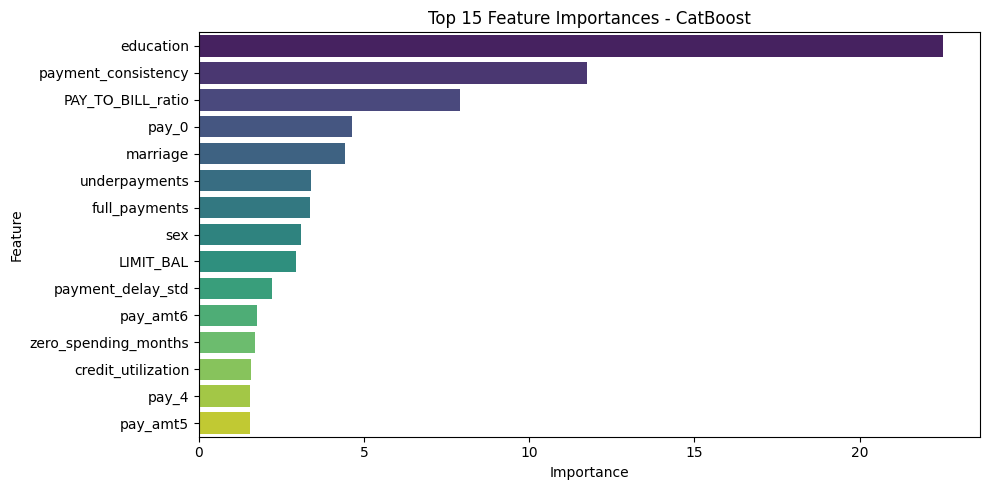

In [26]:
from catboost import CatBoostClassifier
from sklearn.metrics import fbeta_score, classification_report

# 1. Train the CatBoost model
ctb_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.01,
    depth=10,
    loss_function='Logloss',
    class_weights=[1, 5],  # Adjust based on class imbalance
    verbose=100,
    random_seed=42
)

ctb_model.fit(X_train_resampled, y_train_resampled)

# 2. Predict probabilities for class 1
y_proba = ctb_model.predict_proba(X_test_scaled)[:, 1]

# 3. Find best threshold for F2 score
best_threshold = 0.5
best_f2 = 0

for threshold in np.arange(0.1, 0.91, 0.01):
    y_pred_thresh = (y_proba >= threshold).astype(int)
    f2 = fbeta_score(y_test, y_pred_thresh, beta=2)
    if f2 > best_f2:
        best_f2 = f2
        best_threshold = threshold

# 4. Final predictions with best threshold
y_pred = (y_proba >= best_threshold).astype(int)

print(f"\nBest Threshold: {best_threshold:.2f}")
print(f"F2 Score at Best Threshold: {best_f2:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# 5. Feature Importance
importances = ctb_model.get_feature_importance()
feature_names = X.columns  # assuming X is your original DataFrame
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 6. Plot top 15 important features
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette='viridis')
plt.title('Top 15 Feature Importances - CatBoost')
plt.tight_layout()
plt.show()

In [27]:
importance_df

,Feature,Importance
2,education,22.517663
29,payment_consistency,11.735619
24,PAY_TO_BILL_ratio,7.911300
5,pay_0,4.630213
0,marriage,4.433047
39,underpayments,3.384123
34,full_payments,3.355705
1,sex,3.083445
3,LIMIT_BAL,2.939423
35,payment_delay_std,2.221412


In [28]:
X

,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,Bill_amt1,Bill_amt2,Bill_amt3,Bill_amt4,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,avg_payment,credit_utilization,delinquency_streak,avg_payment_delay,payment_consistency,has_overpaid,missed_payments,utilization_volatility,repayment_to_utilization,full_payments,payment_delay_std,bill_trend,bill_skewness,max_payment_delay,underpayments,zero_spending_months,late_payment_ratio,no_usage_flag
0,2,0,2,60000,25.0,2,2,2,0,0,0,60323.86,60728.22,56472.74,28602.01,22191.53,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,1326.185000,0.691858,3,2.0,0.833333,0,3,19585.483475,0.031947,0,1.095445,-9752.770000,-0.048236,2,6,0,0.500000,0
1,2,1,1,290000,24.0,0,0,-2,-2,-1,0,11157.67,0.00,0.88,0.65,2700.96,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,674.998333,0.008740,0,0.0,0.500000,0,0,4360.101233,0.266263,2,0.983192,-1169.548571,2.137511,0,4,1,0.000000,0
2,1,0,2,180000,63.0,0,0,0,0,0,0,47930.96,48921.91,50034.26,50748.90,51902.56,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,2009.286667,0.280122,0,0.0,1.000000,0,0,1871.213251,0.039850,0,0.000000,998.838286,0.062749,0,6,0,0.000000,0
3,1,1,2,210000,43.0,0,0,0,0,0,0,91152.44,92916.01,90652.30,85295.56,80416.75,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,3074.916667,0.410617,0,0.0,1.000000,0,0,6470.848989,0.035660,0,0.000000,-3253.982000,-0.545667,0,6,0,0.000000,0
4,2,0,1,280000,32.0,-2,-2,-2,-2,-2,-2,19666.40,999.04,3186.48,44932.48,2099.77,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,8552.366667,0.042194,0,0.0,1.000000,0,0,17797.732038,0.723902,2,0.000000,-1522.201714,1.720749,-2,4,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25242,1,1,2,90000,33.0,0,0,0,0,2,2,75452.79,76395.38,79167.72,84903.65,87915.80,90042.87,2800.18,3999.97,8000.09,5347.85,3699.98,3128.06,82312.50,0.05,4496.021667,0.914583,2,2.0,1.000000,0,2,6161.610495,0.054621,0,1.032796,3235.645429,0.120440,2,6,0,0.333333,0
25243,1,0,2,60000,49.0,0,0,0,0,0,0,59578.90,66780.96,65507.11,17677.07,19481.11,19204.07,22000.17,2187.56,2501.13,2512.09,4004.89,2604.22,41371.67,0.14,5968.343333,0.689528,0,0.0,1.000000,0,0,24866.394522,0.144262,0,0.000000,-11188.678286,0.035420,0,6,0,0.000000,0
25244,2,0,1,120000,31.0,-1,-1,-1,-1,-1,-1,1315.64,1315.42,1315.52,533.03,4115.37,9834.64,1315.83,1315.60,533.08,4116.08,9834.10,7100.12,3071.83,1.31,4035.801667,0.025599,0,0.0,1.000000,0,0,3536.209388,1.313907,4,0.000000,1434.638857,1.885121,-1,2,0,0.000000,0
25245,1,1,4,390000,40.0,0,0,0,0,0,0,195687.97,199033.02,197960.89,195958.31,196017.91,199013.32,7636.03,5652.86,5544.67,5532.37,5859.09,6818.14,197278.83,0.03,6173.860000,0.505843,0,0.0,1.000000,0,0,1575.777358,0.031295,0,0.000000,159.395429,0.200070,0,6,0,0.000000,0


In [29]:
dt= pd.read_csv('/content/validate_dataset_final.csv')
dt.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,Bill_amt1,Bill_amt2,Bill_amt3,Bill_amt4,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio
0,1,1,1,2,220000,32,0,0,0,0,0,0,28853.10,29144.77,27172.12,22066.47,17831.13,15670.47,2000.03,3999.90,1419.80,1999.97,3000.21,30788.71,23456.33,0.31
1,2,2,0,1,350000,35,-1,-1,-1,0,0,0,4438.78,33718.18,14284.09,16425.68,10832.78,2261.45,33891.01,16267.19,4026.80,234.10,1565.11,26346.39,13660.33,1.00
2,3,2,1,1,310000,39,0,0,0,0,0,0,300500.53,265766.60,245457.90,249435.52,240520.57,246524.45,11026.94,10499.83,14000.32,10000.12,10000.16,10000.21,258034.17,0.04
3,4,1,0,2,20000,47,0,0,0,2,2,2,10628.45,11650.67,14252.14,13678.06,15040.17,14749.97,1200.00,2799.83,0.14,1499.93,0.02,1000.26,13333.33,0.08
4,5,2,1,2,500000,30,0,0,0,0,0,0,98617.77,73464.07,84740.39,72510.59,69054.15,64841.30,25463.94,43095.31,7521.96,9065.17,8841.07,12000.21,77204.50,0.23


In [30]:
pay_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
bill_cols = ['Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6']
pay_amt_cols = ['pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']

# 0. Average Payment
dt['avg_payment'] = dt[pay_amt_cols].mean(axis=1)

# 1. Credit Utilization Ratio
dt['credit_utilization'] = dt['AVG_Bill_amt'] / dt['LIMIT_BAL']

# 2. Delinquency Streak
dt['delinquency_streak'] = dt.apply(longest_delinquency_streak, axis=1)

# 3. Average Payment Delay (ignoring -1, -2, and 0)
dt['avg_payment_delay'] = dt[pay_cols].apply(lambda x: x[x > 0].mean() if any(x > 0) else 0, axis=1)

# 4. Payment Consistency Ratio
dt['payment_consistency'] = dt[pay_amt_cols].gt(0).sum(axis=1) / 6

# 5. Overpayment Indicator
dt['has_overpaid'] = dt[bill_cols].lt(0).any(axis=1).astype(int)

# 6. Total Missed Payments
dt['missed_payments'] = dt[pay_cols].gt(0).sum(axis=1)

# 7. Utilization Volatility
dt['utilization_volatility'] = dt[bill_cols].std(axis=1)

# 8. Repayment to Utilization Ratio
dt['repayment_to_utilization'] = dt[pay_amt_cols].sum(axis=1) / dt[bill_cols].sum(axis=1).replace(0, np.nan)
dt['repayment_to_utilization'] = dt['repayment_to_utilization'].fillna(0)

# 9. Number of Full Payments (payment ≥ bill)
dt['full_payments'] = (dt[pay_amt_cols].values >= dt[bill_cols].values).sum(axis=1)

# 10. Payment Delay Std Dev
dt['payment_delay_std'] = dt[pay_cols].std(axis=1)

# 11. Bill Trend (slope)
dt['bill_trend'] = dt[bill_cols].apply(lambda row: linregress(range(1, 7), row)[0], axis=1)

# 12. Bill Skewness
dt['bill_skewness'] = dt[bill_cols].skew(axis=1)

# 13. Maximum Delay
dt['max_payment_delay'] = dt[pay_cols].max(axis=1)

# 14. Underpayment Frequency (payment < bill)
dt['underpayments'] = (dt[pay_amt_cols].values < dt[bill_cols].values).sum(axis=1)

# 15. Zero Spending Months
dt['zero_spending_months'] = (dt[bill_cols] == 0).sum(axis=1)

# 16. Late Payment Ratio
dt['late_payment_ratio'] = dt[pay_cols].gt(0).sum(axis=1) / 6

# 17. No Usage Flag
dt['no_usage_flag'] = (dt[bill_cols].sum(axis=1) == 0).astype(int)


dt.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,Bill_amt1,Bill_amt2,Bill_amt3,Bill_amt4,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,avg_payment,credit_utilization,delinquency_streak,avg_payment_delay,payment_consistency,has_overpaid,missed_payments,utilization_volatility,repayment_to_utilization,full_payments,payment_delay_std,bill_trend,bill_skewness,max_payment_delay,underpayments,zero_spending_months,late_payment_ratio,no_usage_flag
0,1,1,1,2,220000,32,0,0,0,0,0,0,28853.10,29144.77,27172.12,22066.47,17831.13,15670.47,2000.03,3999.90,1419.80,1999.97,3000.21,30788.71,23456.33,0.31,7201.436667,0.106620,0,0.0,1.0,0,0,5822.109123,0.307014,1,0.000000,-2998.849143,-0.395401,0,5,0,0.0,0
1,2,2,0,1,350000,35,-1,-1,-1,0,0,0,4438.78,33718.18,14284.09,16425.68,10832.78,2261.45,33891.01,16267.19,4026.80,234.10,1565.11,26346.39,13660.33,1.00,13721.766667,0.039030,0,0.0,1.0,0,0,11254.510849,1.004510,2,0.547723,-2211.464571,1.221314,0,4,0,0.0,0
2,3,2,1,1,310000,39,0,0,0,0,0,0,300500.53,265766.60,245457.90,249435.52,240520.57,246524.45,11026.94,10499.83,14000.32,10000.12,10000.16,10000.21,258034.17,0.04,10921.263333,0.832368,0,0.0,1.0,0,0,22514.357169,0.042325,0,0.000000,-9761.167714,1.775000,0,6,0,0.0,0
3,4,1,0,2,20000,47,0,0,0,2,2,2,10628.45,11650.67,14252.14,13678.06,15040.17,14749.97,1200.00,2799.83,0.14,1499.93,0.02,1000.26,13333.33,0.08,1083.363333,0.666667,3,2.0,1.0,0,3,1790.583297,0.081253,0,1.095445,862.914857,-0.831801,2,6,0,0.5,0
4,5,2,1,2,500000,30,0,0,0,0,0,0,98617.77,73464.07,84740.39,72510.59,69054.15,64841.30,25463.94,43095.31,7521.96,9065.17,8841.07,12000.21,77204.50,0.23,17664.610000,0.154409,0,0.0,1.0,0,0,12414.655025,0.228802,0,0.000000,-5552.626000,1.200882,0,6,0,0.0,0


In [45]:
# Train CatBoost model on full dataset
final_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.01,
    depth=10,
    loss_function='Logloss',
    class_weights=[1, 5],
    verbose=100,
    random_seed=42
)

final_model.fit(X, y)

y_proba = final_model.predict_proba(dt.iloc[:,1:])[:, 1]  # Probability of class 1

threshold = 0.45
dt['next_month_default'] = (y_proba >= threshold).astype(int)

dt.head()


0:	learn: 0.6898762	total: 230ms	remaining: 3m 49s
100:	learn: 0.5577399	total: 10.1s	remaining: 1m 29s
200:	learn: 0.5218633	total: 20.4s	remaining: 1m 21s
300:	learn: 0.4995172	total: 30.2s	remaining: 1m 10s
400:	learn: 0.4826434	total: 40.6s	remaining: 1m
500:	learn: 0.4667077	total: 49.7s	remaining: 49.5s
600:	learn: 0.4511680	total: 58.9s	remaining: 39.1s
700:	learn: 0.4363552	total: 1m 8s	remaining: 29.3s
800:	learn: 0.4227913	total: 1m 18s	remaining: 19.5s
900:	learn: 0.4101285	total: 1m 27s	remaining: 9.66s
999:	learn: 0.3966664	total: 1m 37s	remaining: 0us


,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,Bill_amt1,Bill_amt2,Bill_amt3,Bill_amt4,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,avg_payment,credit_utilization,delinquency_streak,avg_payment_delay,payment_consistency,has_overpaid,missed_payments,utilization_volatility,repayment_to_utilization,full_payments,payment_delay_std,bill_trend,bill_skewness,max_payment_delay,underpayments,zero_spending_months,late_payment_ratio,no_usage_flag,next_month_default
0,1,1,1,2,220000,32,0,0,0,0,0,0,28853.10,29144.77,27172.12,22066.47,17831.13,15670.47,2000.03,3999.90,1419.80,1999.97,3000.21,30788.71,23456.33,0.31,7201.436667,0.106620,0,0.0,1.0,0,0,5822.109123,0.307014,1,0.000000,-2998.849143,-0.395401,0,5,0,0.0,0,0
1,2,2,0,1,350000,35,-1,-1,-1,0,0,0,4438.78,33718.18,14284.09,16425.68,10832.78,2261.45,33891.01,16267.19,4026.80,234.10,1565.11,26346.39,13660.33,1.00,13721.766667,0.039030,0,0.0,1.0,0,0,11254.510849,1.004510,2,0.547723,-2211.464571,1.221314,0,4,0,0.0,0,0
2,3,2,1,1,310000,39,0,0,0,0,0,0,300500.53,265766.60,245457.90,249435.52,240520.57,246524.45,11026.94,10499.83,14000.32,10000.12,10000.16,10000.21,258034.17,0.04,10921.263333,0.832368,0,0.0,1.0,0,0,22514.357169,0.042325,0,0.000000,-9761.167714,1.775000,0,6,0,0.0,0,0
3,4,1,0,2,20000,47,0,0,0,2,2,2,10628.45,11650.67,14252.14,13678.06,15040.17,14749.97,1200.00,2799.83,0.14,1499.93,0.02,1000.26,13333.33,0.08,1083.363333,0.666667,3,2.0,1.0,0,3,1790.583297,0.081253,0,1.095445,862.914857,-0.831801,2,6,0,0.5,0,1
4,5,2,1,2,500000,30,0,0,0,0,0,0,98617.77,73464.07,84740.39,72510.59,69054.15,64841.30,25463.94,43095.31,7521.96,9065.17,8841.07,12000.21,77204.50,0.23,17664.610000,0.154409,0,0.0,1.0,0,0,12414.655025,0.228802,0,0.000000,-5552.626000,1.200882,0,6,0,0.0,0,0


In [48]:
final_df = dt[['Customer_ID', 'next_month_default']]
final_df.head()

,Customer_ID,next_month_default
0,1,0
1,2,0
2,3,0
3,4,1
4,5,0


In [49]:
final_df.to_csv('default_predictions')